# Chapter 1 Portfolio Basics

## Course overview
* ch1 Porfolio weights and returns
* ch2 Portfolio performance evaluation
* ch3 Drivers of Performance
* ch4 Portofolio Optimization

## To avoid large losses
* carefully select deversified portfolios
* backtest portfolio strategy
* constant monitoring of portfolio performance

In [110]:
require(quantmod)

[1] "PEP" "KO"

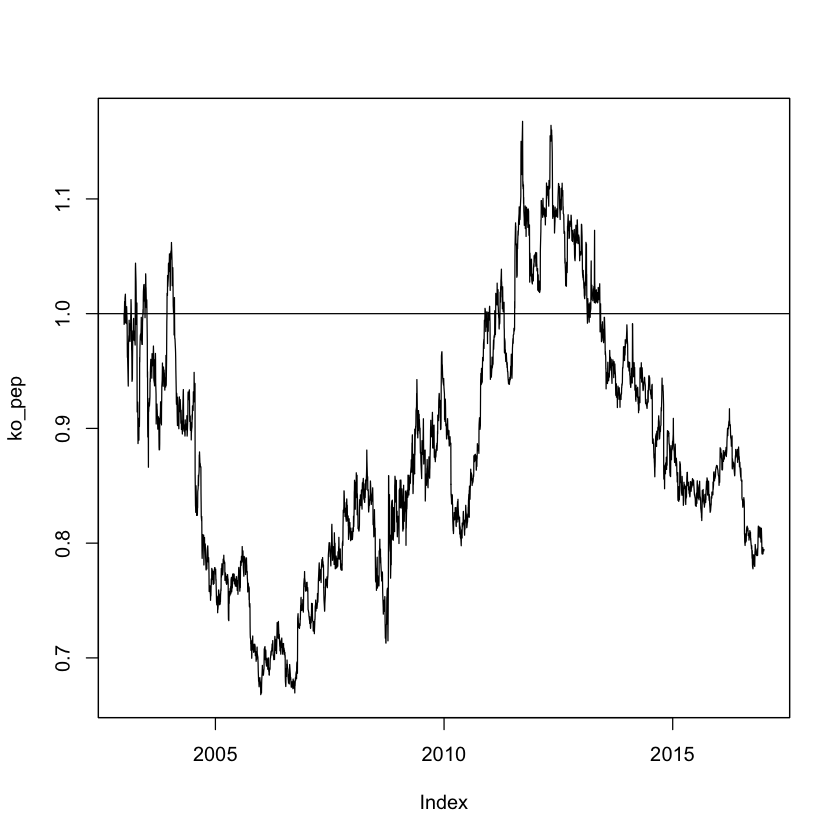

In [111]:
##first example show how two companies (pepsico and coca-kola) selling similar products
# can have a evolving relative value
tkr<-new.env()
getSymbols(c('PEP','KO'), env=tkr, src="yahoo", from=as.Date("2003-01-02") )
ko<-Ad(tkr$KO)  # adjusted value
ko<-ko/as.numeric(ko[1]) #normalize by first element
pep<-Ad(tkr$PEP)
pep<-pep/as.numeric(pep[1])
ko_pep <-ko/pep #ratio of two tickers
plot.zoo(ko_pep)
abline(h=1)

## Portfolio weights
For N investments $V_1,..V_N$ the i_th weight $w_i = \frac{V_i}{\sum_i^N V_i}$

### analyzing values of portfolio weights reveal the investment bets

In [112]:
#simple R to compute weights given amounts for each asset class 
# Define the vector values
values <- c(4000,4000,2000)
names(values) <- c("Equities", "Bonds", "Commodities")
# Define the vector weights
weights <- values/sum(values)

# Print the resulting weights Sum of weights always yields to 1
print(weights)


   Equities       Bonds Commodities 
        0.4         0.4         0.2 


![title](alloc_strat.png)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001442 0.003389 0.018030 0.100000 0.115400 0.576900 

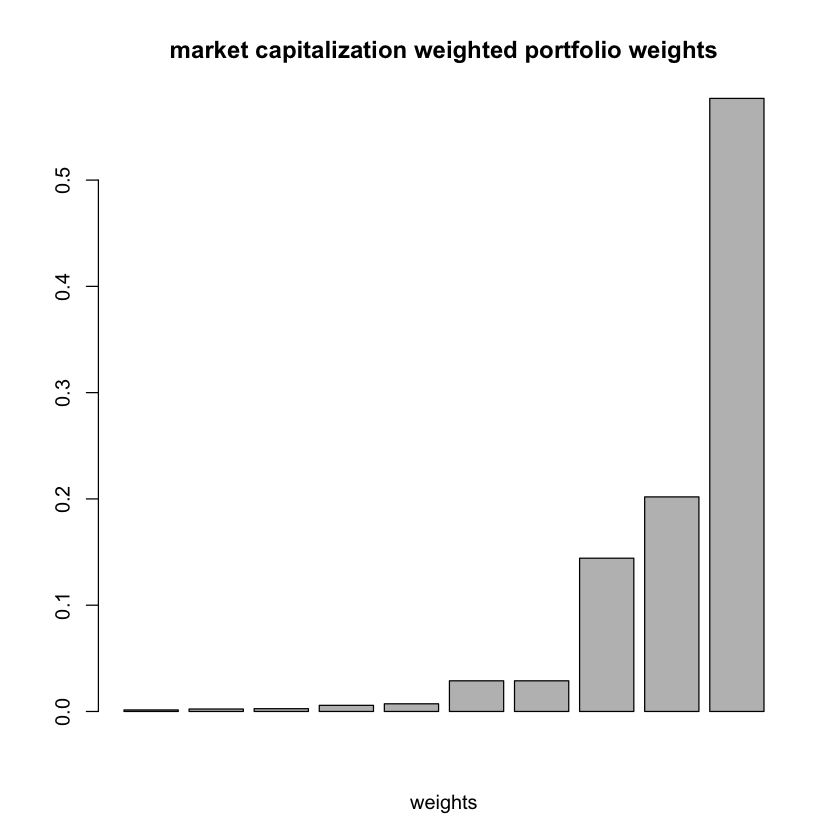

In [113]:
#a simple example of market capitalization weighted portfolio
#using 10 market capitalisations in millions USD
# Define marketcaps
marketcaps<-c(5, 8, 9, 20, 25, 100, 100, 500, 700, 2000) 
  
# Compute the weights
weights <- marketcaps/sum(marketcaps)
  
# Inspect summary statistics
summary(weights)
  
# Create a barplot of weights
  barplot(weights,main="market capitalization weighted portfolio weights" , xlab="weights")
# the bigget weigth comes for a biggest marketcap

# Porfolio Returns
### return is a relative change  in value
$$ R = \frac{EMV-BMV}{BMV} $$
### 3 steps
* initial portfolio value = sum of N investments at initial date
* final portfolio value = sum of N investment values at final date
* $$  R=\frac{finalValue - initialValue}{initialValue} $$


![title](ex_2assets_ret_1.png)

# Portfolio return also
$$PortfolioReturn = w_1 R_1 + w_2 R_2+..+w_n R_n$$
where  
$$w_i=\frac{Asset_i}{\sum_i^N Asset_i}$$
and 
$$ R_i =\frac{EMV(Asset_i)-BMV(Asset_i)}{BMV(Asset_i)}$$

In [114]:
## so the previous example using the sum of weighted returns formula
bmv<-c(200,300)
emv<-c(180,330)
wgh<-bmv/sum(bmv)
ret<-(emv-bmv)/bmv
print(wgh) #weights
print(ret) #2 asset individual returns
r_prtf <- sum(wgh*ret) #portfolio return
print(r_prtf)

[1] 0.4 0.6
[1] -0.1  0.1
[1] 0.02


In [115]:
#first chain-link example
#first period you make 10%  but second period you loose 5% 
#Q what is the final value of $1000 invested ?

1000*(1+0.1)*(1-0.05)

[1] 1045

### Q. after a loss of 50% in 1 period what should be a return in the next period to pare a loss?

In [116]:
#(1-0.5)*(1+x) = 1
#1+x-0.5-0.5x=1
#0.5x=0.5
#x=1
## i.e. you need a 100% return to erase a previous 50% loss 

## The practioner's challenge
* in practice, time series of portfolio returns
* longer history means more info on portfolio available

### use PerformanceAnalytics Package

### Dynamics of Porfolio Weights  2 approaches
* Set initial weights  and do not intervene
* actively change portfolio weights. (**Rebalancing**)



In [117]:
#first usage of PortfolioAnalytics Return.Calculate
require(PerformanceAnalytics)
#tkr env is present
getSymbols(c('AAPL','MSFT'), env=tkr, src="yahoo", from=as.Date("2006-01-01"),to=as.Date("2016-08-31"))
prices<-cbind(Ad(tkr$AAPL), Ad(tkr$MSFT))
returns<-Return.calculate(prices)
returns<-returns[-1,] #remove first NA line
#print head of returns
head(returns,2)

[1] "AAPL" "MSFT"

           AAPL.Adjusted MSFT.Adjusted
2006-01-04   0.002943074  0.0048435111
2006-01-05  -0.007869759  0.0007415454

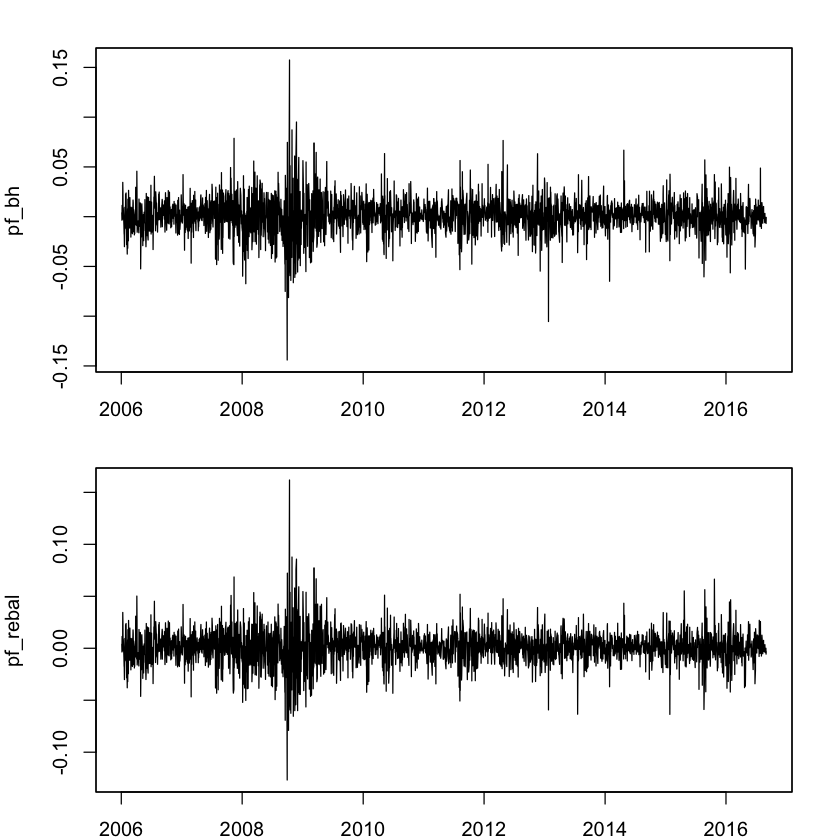

In [118]:
##first usage of Return.portfolio
#create equal weights for 2-asset portfolio
eq_weights <- c(0.5, 0.5)
# Create a portfolio using buy and hold (weights fixed, no rebalancing)
pf_bh <- Return.portfolio(R =returns, weights =eq_weights)
# Create a portfolio rebalancing monthly 
pf_rebal <- Return.portfolio(R=returns, weights=eq_weights,rebalance_on="months")
# Plot the time-series of daily returns
par(mfrow = c(2, 1), mar = c(2, 4, 2, 2))
plot.zoo(pf_bh)
plot.zoo(pf_rebal)

           AAPL.Adjusted
2016-08-30     0.7968525
2016-08-31     0.7982086

           AAPL.Adjusted
2016-08-30     0.4987742
2016-08-31     0.5008739

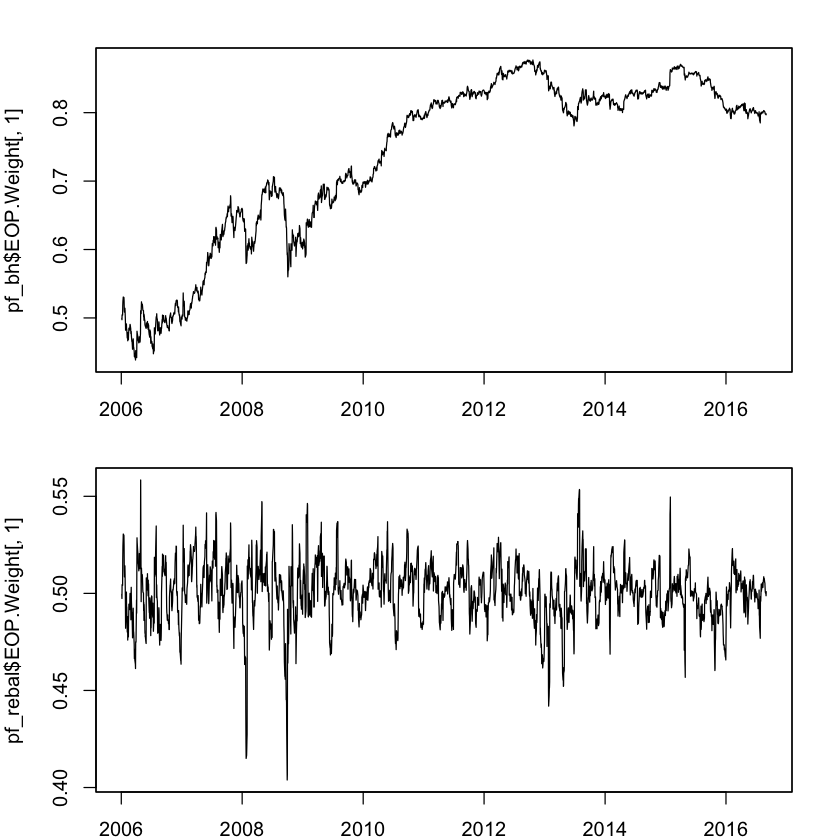

In [119]:
#getting portfolio returns as well as bop, eop weights
pf_bh <- Return.portfolio(R =returns, weights =eq_weights, verbose=TRUE)
pf_rebal <- Return.portfolio(R=returns, weights=eq_weights,rebalance_on="months",verbose=TRUE)
## see apple eop period weighgs for buy&hold and rebalanced portfolio
tail(pf_bh$EOP.Weight$AAPL.Adjusted,2)
tail(pf_rebal$EOP.Weight$AAPL.Adjusted,2)
##plot these end of period weights
par(mfrow = c(2, 1), mar=c(2, 4, 2, 2))
plot.zoo(pf_bh$EOP.Weight[,1])
#as we can see rebalanced weight oscilates around 0.5 and b&h  grows higher because AAPL relatively outperforms MSFT
plot.zoo(pf_rebal$EOP.Weight[,1])

# Chapter 2 Dimensions of portfolio performance
### risk 
### reward

#### Portfolio mean return
#### Portfolio volatility
**assume a sample of T portfolio return observation**
$$ R_1,R_2,\dots,R_T$$

* **Arithmetic** mean return
$$ \hat{\mu} = \frac{R_1+R_2+..+R_T}{T}$$

Returns can deviate from average return **De-meaned return** $R_i-\hat{\mu}$

* Variance of the portfolio
$$ \hat{\sigma}^2= \frac{\sum_{j=1}^T (R_j-\hat{\mu})^2}{T-1}$$
* **volatility** of portfolio is a square root of its variance


### Arithmetic return mean vs geometric return mean
* Arithmetic mean return does not reflect  non zero contribution of +r followed by -r
* **Geometric** mean
$$ \hat{R} = \left[(1+R_1)*..*(1+R_T)\right]^{\frac{1}{T}} - 1 $$
e.g 
$$ [(1+0.5)*(1-0.5)]^{\frac{1}{2}} -1 \neq 0 = -0.134 $$


In [120]:
## Exploring the monthly S&P 500 returns

getSymbols("^GSPC", env=tkr, src = "yahoo", from = as.Date("1985-12-31") ) #from 1986 to now
sp500d <- Ad(tkr$GSPC)
sp500_monthly<-to.monthly(sp500d)
#head(sp500_monthly) # print head of monthly closes
sp500_returns <- Return.calculate(Cl(sp500_monthly))
sp500_returns <- sp500_returns[-1,] #get rid of first na value
##print returns in  calendar format
table.CalendarReturns(sp500_returns)

[1] "GSPC"

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,sp500d.Close
1986,0.2,7.1,5.3,-1.4,5,1.4,-5.9,7.1,-8.5,5.5,2.1,-2.8,14.6
1987,13.2,3.7,2.6,-1.1,0.6,4.8,4.8,3.5,-2.4,-21.8,-8.5,7.3,2
1988,4,4.2,-3.3,0.9,0.3,4.3,-0.5,-3.9,4,2.6,-1.9,1.5,12.4
1989,7.1,-2.9,2.1,5,3.5,-0.8,8.8,1.6,-0.7,-2.5,1.7,2.1,27.3
1990,-6.9,0.9,2.4,-2.7,9.2,-0.9,-0.5,-9.4,-5.1,-0.7,6,2.5,-6.6
1991,4.2,6.7,2.2,0,3.9,-4.8,4.5,2,-1.9,1.2,-4.4,11.2,26.3
1992,-2,1,-2.2,2.8,0.1,-1.7,3.9,-2.4,0.9,0.2,3,1,4.5
1993,0.7,1,1.9,-2.5,2.3,0.1,-0.5,3.4,-1,1.9,-1.3,1,7.1
1994,3.3,-3,-4.6,1.2,1.2,-2.7,3.1,3.8,-2.7,2.1,-4,1.2,-1.5
1995,2.4,3.6,2.7,2.8,3.6,2.1,3.2,0,4,-0.5,4.1,1.7,34.1


In [121]:
#returns can be calculated using the lag function which changes the index by 1
#i.e.
sp500_returns_same <- Cl(sp500_monthly) / lag(Cl(sp500_monthly)) -1
sp500_returns_same<-sp500_returns_same[-1,] #get rid of fist NA
head(sp500_returns)
head(sp500_returns_same)

Warning message:
: timezone of object (UTC) is different than current timezone ().Warning message:
: timezone of object (UTC) is different than current timezone ().

         sp500d.Close
Jan 1986  0.002366528
Feb 1986  0.071489277
Mar 1986  0.052793919
Apr 1986 -0.014148138
May 1986  0.050229288
Jun 1986  0.014109521

Warning message:
: timezone of object (UTC) is different than current timezone ().Warning message:
: timezone of object (UTC) is different than current timezone ().

         sp500d.Close
Jan 1986  0.002366528
Feb 1986  0.071489277
Mar 1986  0.052793919
Apr 1986 -0.014148138
May 1986  0.050229288
Jun 1986  0.014109521

### Basic Statistics of return series 

In [122]:
## The montly mean and volatility 

#mean monthly return
paste("Mean mhth return", mean(sp500_returns))
#geometric mean of monthly returns
paste("Geom mean return", mean.geometric(sp500_returns))
#standard deviation of returns
paste("Standard deviation of month return",sd(sp500_returns))

[1] "Mean mhth return 0.00732686487283978"

[1] "Geom mean return 0.00636567116668108"

[1] "Standard deviation of month return 0.0434607598731739"

### Performance Descriptive statistics
**Sharpe Ratio = slope adjusted reward to risk**
$$ Sharpe=\frac{R_\Pi-\mu_{riskless}}{\sigma_\Pi} $$

example in R

`returns_monthly_sample <- c(-0.02, 0.0, 0.0, 0.06, 0.02, 0.03, 0.01, 0.04)
r_riskfree <-0 0.004
sharpe=( mean(returns_monthly_sample) - r_riskfree)/sd(returns_monthly_sample)`

**Annualization of monthly performance**
* **Arithmentic mean**: montly_mean * 12
* **Geometic mean** (T is a number of monthly observations: 
$$  \left[(1+R_1)*..*(1+R_T)\right]^{\frac{12}{T}} - 1  $$
* **Volatility**: monthly_volatility * sqrt(12)

[1] "DGS1MO"

Warning message:
In to.period(x, "months", indexAt = indexAt, name = name, ...): missing values removed from data

[1] "exccess mean 0.00289414386320435"

[1] "sp500 mean 0.00413742343309682"

[1] "sharpe monthly sp500: 0.0691111280027552"

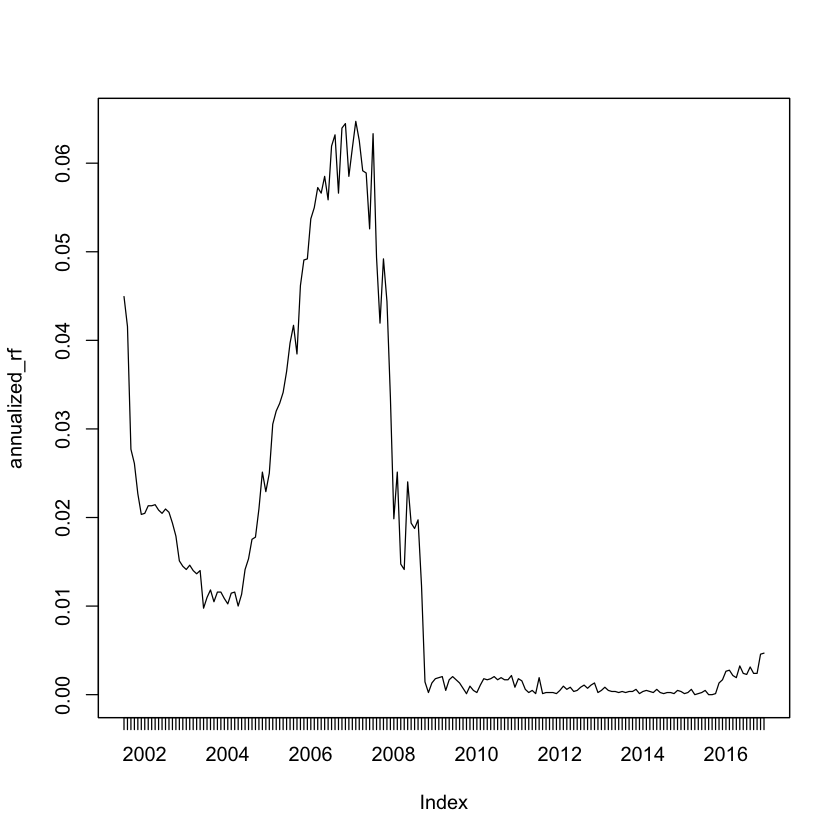

In [123]:
## Excess returns and the portfolio Sharpe ratio

options(download.file.method="wget")
getSymbols('DGS1MO', env=tkr,src='FRED', from=as.Date("1986-01-01"))
trf<-tkr$DGS1MO
##risk free rate (1-month treasury bill downloaded from fred)
rf<-Cl(to.monthly(trf))*0.001 # factor to match the rf data

#start sp500_returns from 2001-Jul the first month of rf
sp500_returns_a<-sp500_returns['2001-07::']

#compute annualized risk fr
annualized_rf <- (1 + rf)^12 - 1  # we have an xts with the same length as rf
# Plot the annualized risk free rate
plot.zoo(annualized_rf)
# Compute the series of excess portfolio returns 
sp500_excess_a <- sp500_returns_a - rf
#compare means
paste("exccess mean", mean(sp500_excess_a))
paste("sp500 mean", mean(sp500_returns_a))

#compute and print the Sharpe Ratio
sp500_sharpe <- mean(sp500_excess_a) / sd(sp500_returns_a) 
paste("sharpe monthly sp500:", sp500_sharpe)


In [124]:
##Annualized mean and volatility 

# Compute the annualized mean
#Return.annualized(sp500_returns)  ## error strage
# Compute the annualized standard deviation
#StdDev.annualized(sp500_returns)


# Compute all of the above at once using table.AnnualizedReturns()
table.AnnualizedReturns(sp500_returns)

##the same sharpe using formulas
sp500_ret_annu <- prod(1+sp500_returns)^(12/nrow(sp500_returns)) -1 
sp500_stdev_annu <- sd(sp500_returns)*sqrt(12)
sp500_sharpe_annu <- sp500_ret_annu  / sp500_stdev_annu #asume r_riskfree= 0
paste('return geom annualized:',sp500_ret_annu )
paste('stdev annualized:', sp500_stdev_annu )
paste('sharpe annulized:',sp500_sharpe_annu )

,sp500d.Close
Annualized Return,0.0791
Annualized Std Dev,0.1506
Annualized Sharpe (Rf=0%),0.5255


[1] "return geom annualized: 0.0791200605347719"

[1] "stdev annualized: 0.150552488471776"

[1] "sharpe annulized: 0.525531403286002"

                                  sp500d.Close
Annualized Sharpe Ratio (Rf=1.5%)    0.1674659


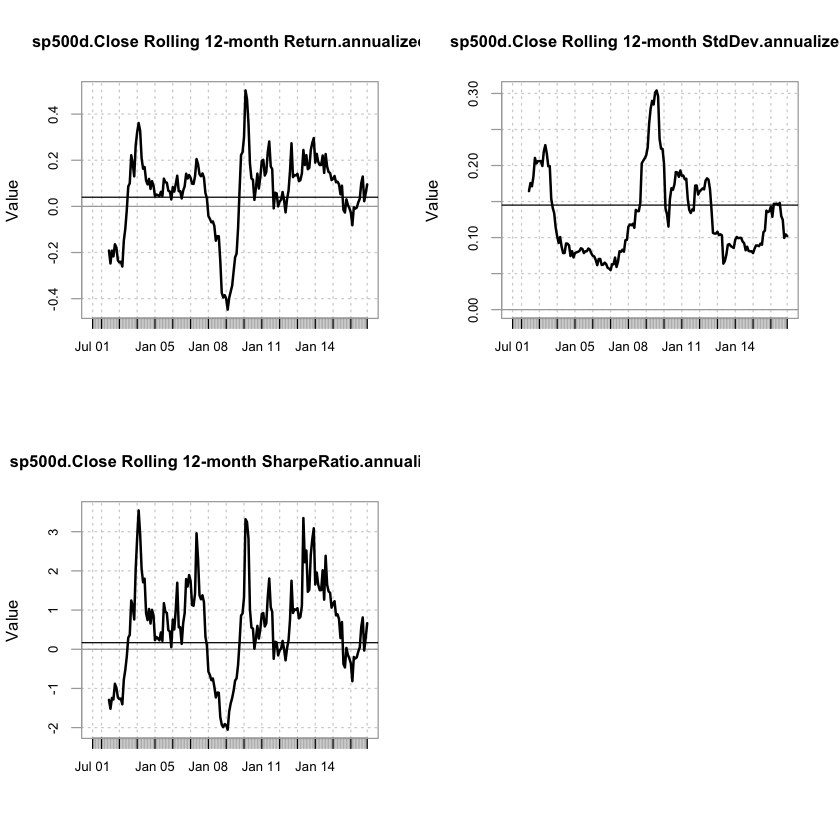

In [157]:
##Rolling annualized mean and volatility

# Calculate the mean, volatility, and sharpe ratio of sp500_returns

#using sp500_returns_a  to match date = '2001-07-31' to rf object
returns_ann<-Return.annualized(sp500_returns_a,scale=12)
sd_ann<-StdDev.annualized(sp500_returns_a,scale=12)
sharpe_ann<-SharpeRatio.annualized(sp500_returns_a,Rf=rf,scale=12) # rf = risk-free rate (1-mo T bill)

par(mfrow=c(2,2))
# Plotting the 12-month rolling annualized mean
chart.RollingPerformance(R = sp500_returns_a, width = 12
                        ,FUN = "Return.annualized", scale=12)
abline(h = returns_ann)

# Plotting the 12-month rolling annualized standard deviation
chart.RollingPerformance(R = sp500_returns_a, width = 12
                        ,FUN = "StdDev.annualized", scale=12)
abline(h = sd_ann)


# Plotting the 12-month rolling annualized Sharpe ratio
chart.RollingPerformance(R = sp500_returns_a, width = 12
                        ,FUN = "SharpeRatio.annualized", Rf=rf,scale=12)
abline(h = sharpe_ann)

print(sharpe_ann)


ERROR: Error in eval(expr, envir, enclos): object 'sp500_returns_d' not found


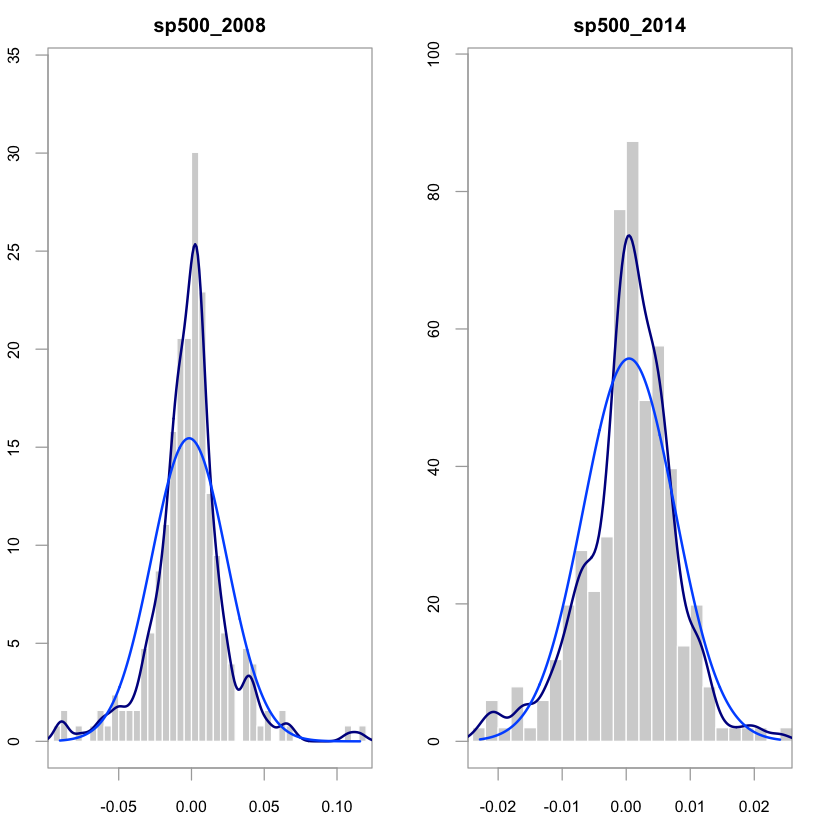

In [168]:
## Subperiod performance analysis and the function window

sp500_returns_dly <- sp500d/lag(sp500d) -1 
sp500_returns_dly <- sp500_returns_d[-1,] # get rid of first value

# Fill in window for 2008 use function window
sp500_2008 <- window(sp500_returns_dly, start = "2008-01-01", end = "2008-12-31")

# Create window for 2014
sp500_2014 <- window(sp500_returns_dly, start = "2014-01-01", end = "2014-12-31")


# Plotting settings
par(mfrow = c(1, 2) , mar=c(3, 2, 2, 2))
names(sp500_2008) <- "sp500_2008"
names(sp500_2014) <- "sp500_2014"

# Plot histogram of 2008
chart.Histogram(sp500_2008, breaks=40, methods = c("add.density", "add.normal"))

# Plot histogram of 2014
chart.Histogram(sp500_2014, methods = c("add.density", "add.normal"))


[1] -0.8258324

[1] -0.7935442

[1] 20.98755

[1] 2.470361

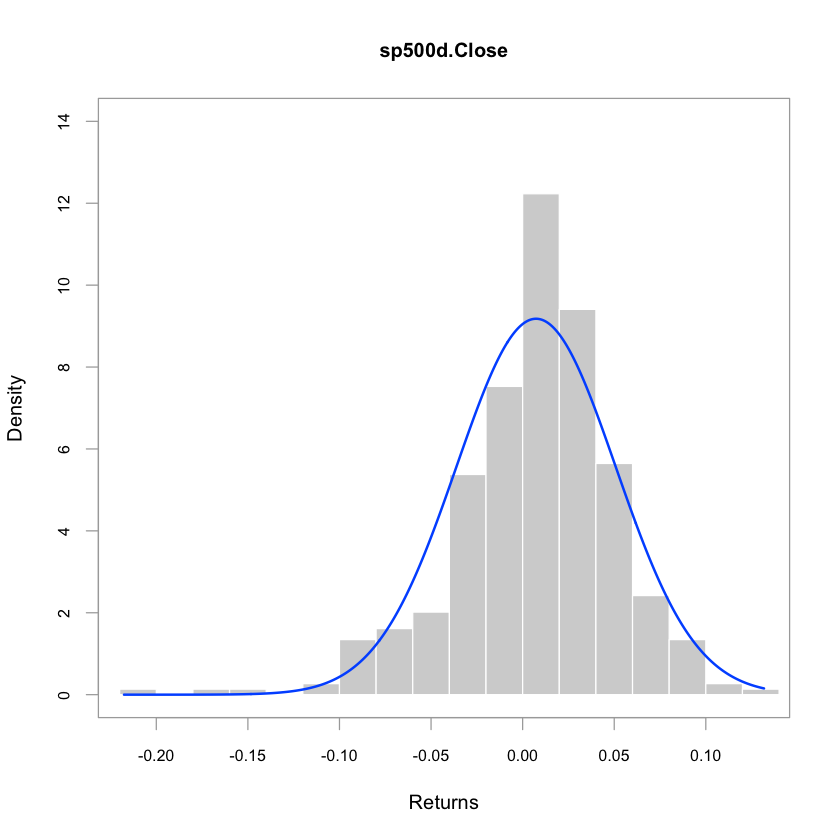

In [176]:
## Detecting non-normality using skewness and kurtosis

#skewness and excess kurtosis performance analytics functions

skewness(sp500_returns_dly)
skewness(sp500_returns)
  

# Compute the excess kurtois 
kurtosis(sp500_returns_dly)
kurtosis(sp500_returns)

chart.Histogram(sp500_returns, methods = c("add.normal") )


In [180]:
##Downside risk measures

#PerformanceAnalytics functions SemiDeviation(), VaR() and ES() for expected shortfall

# Calculate the SemiDeviation
SemiDeviation(sp500_returns)

# Calculate the value at risk
VaR(sp500_returns, p=0.025)  #2.5 % percentile , 97.5% confidence
VaR(sp500_returns, p=0.05)  # 5 % perecentile, 95% confidence


# Calculate the expected shortfall
ES(sp500_returns, p=0.025)
ES(sp500_returns, p=0.05)

,sp500d.Close
Semi-Deviation,0.03320189


,sp500d.Close
VaR,-0.09742657


,sp500d.Close
VaR,-0.07117675


,sp500d.Close
ES,-0.1655038


,sp500d.Close
ES,-0.1178378


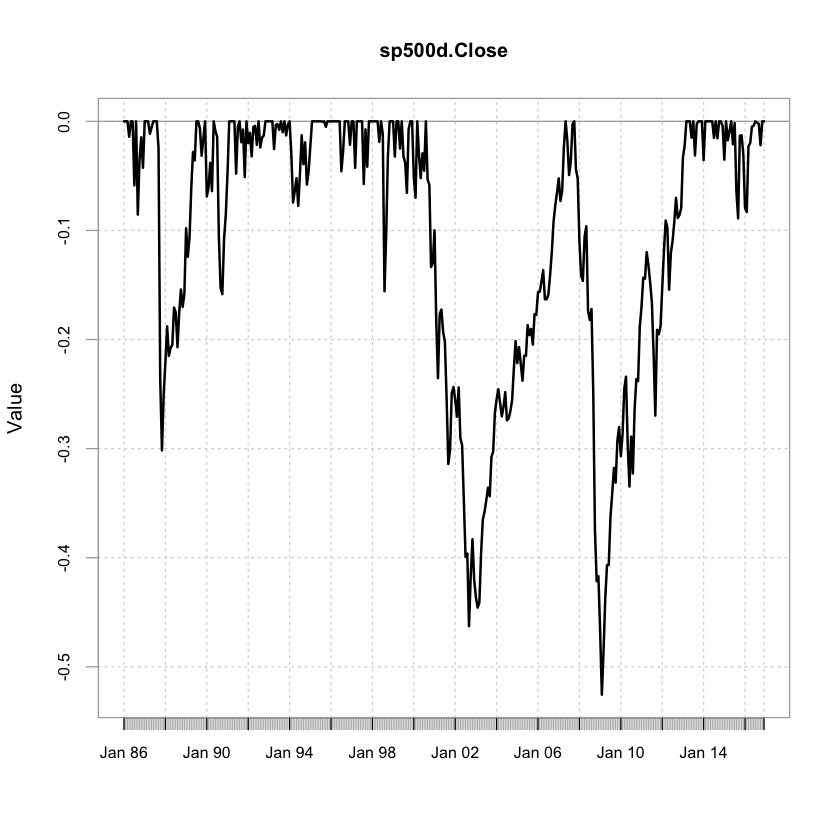

In [190]:
## Drawdowns due to buying high, selling low

#table.Drawdowns(sp500_returns) # error ? 
chart.Drawdown(sp500_returns)

In [188]:
head(sp500_returns)
#str(sp500_returns)

Warning message:
: timezone of object (UTC) is different than current timezone ().Warning message:
: timezone of object (UTC) is different than current timezone ().

         sp500d.Close
Jan 1986  0.002366528
Feb 1986  0.071489277
Mar 1986  0.052793919
Apr 1986 -0.014148138
May 1986  0.050229288
Jun 1986  0.014109521